    Year  Northeast  Midwest   West  South
0   2024      17.15    20.75  23.85  39.65
1   2025      17.11    20.74  23.89  40.05
2   2026      17.07    20.73  23.93  40.45
3   2027      17.03    20.72  23.97  40.85
4   2028      16.99    20.71  24.01  41.25
5   2029      16.95    20.70  24.05  41.65
6   2030      16.91    20.69  24.09  42.05
7   2031      16.87    20.68  24.13  42.45
8   2032      16.83    20.67  24.17  42.85
9   2033      16.79    20.66  24.21  43.25
10  2034      16.75    20.65  24.25  43.65
11  2035      16.71    20.64  24.29  44.05
12  2036      16.67    20.63  24.33  44.45
13  2037      16.63    20.62  24.37  44.85
14  2038      16.59    20.61  24.41  45.25
15  2039      16.55    20.60  24.45  45.65
16  2040      16.51    20.59  24.49  46.05
17  2041      16.47    20.58  24.53  46.45
18  2042      16.43    20.57  24.57  46.85
19  2043      16.39    20.56  24.61  47.25
20  2044      16.35    20.55  24.65  47.65
21  2045      16.31    20.54  24.69  48.05
22  2046   

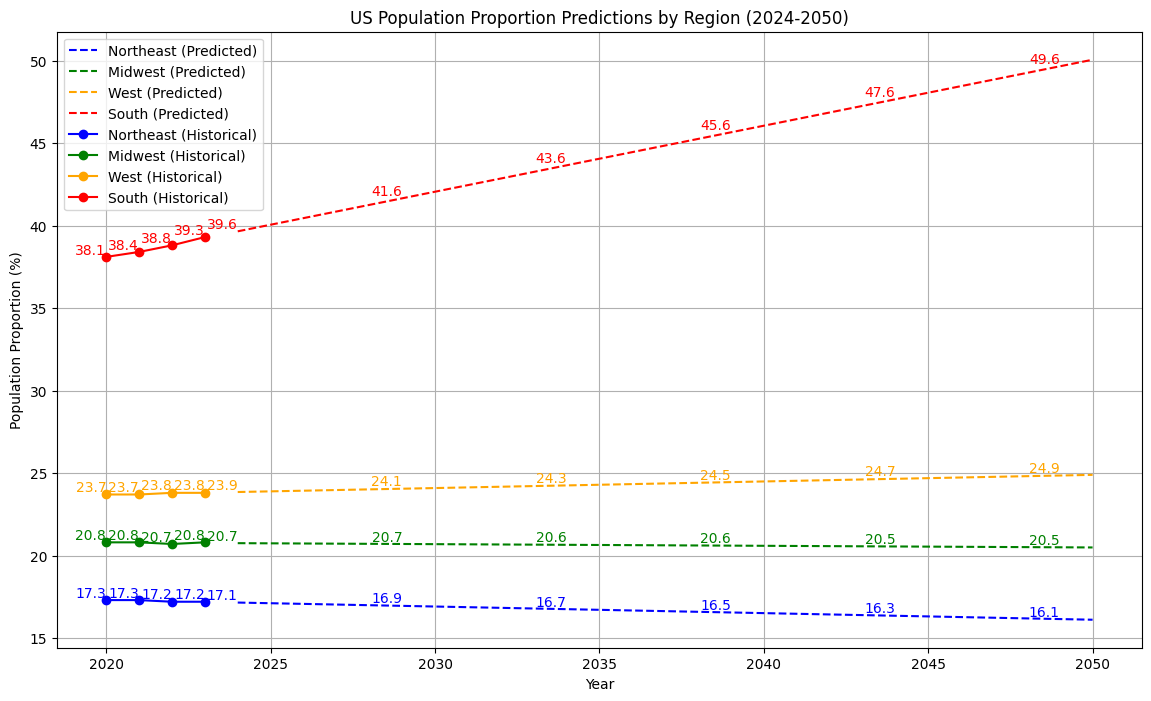

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Create the DataFrame based on the provided data
data = {
    'Year': [2020, 2021, 2022, 2023],
    'Northeast': [17.3, 17.3, 17.2, 17.2],
    'Midwest': [20.8, 20.8, 20.7, 20.8],
    'West': [23.7, 23.7, 23.8, 23.8],
    'South': [38.1, 38.4, 38.8, 39.3]
}

df = pd.DataFrame(data)

# Extract the features and target variables
years = df['Year'].values.reshape(-1, 1)
northeast_prop = df['Northeast'].values
midwest_prop = df['Midwest'].values
west_prop = df['West'].values
south_prop = df['South'].values

# Function to create and train a linear regression model
def create_model(years, proportion):
    model = LinearRegression()
    model.fit(years, proportion)
    return model

# Create models for each region
models = {
    'Northeast': create_model(years, northeast_prop),
    'Midwest': create_model(years, midwest_prop),
    'West': create_model(years, west_prop),
    'South': create_model(years, south_prop)
}

# Predict population proportions for the years 2024 to 2050
future_years = np.arange(2024, 2051).reshape(-1, 1)
predictions = {
    'Year': future_years.flatten()
}

for region, model in models.items():
    predictions[region] = model.predict(future_years)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Print the predictions
print(predictions_df)

# Visualize the population proportion predictions
plt.figure(figsize=(14, 8))

# Define colors for each region
colors = {
    'Northeast': 'blue',
    'Midwest': 'green',
    'West': 'orange',
    'South': 'red'
}

for region in models.keys():
    plt.plot(predictions_df['Year'], predictions_df[region], linestyle='--', color=colors[region], label=f'{region} (Predicted)')

    # Label data points for every 5 years
    for i in range(0, len(predictions_df), 5):
        plt.text(predictions_df['Year'][i], predictions_df[region][i], 
                 f'{predictions_df[region][i]:.1f}', 
                 verticalalignment='bottom', horizontalalignment='right', color=colors[region])

# Plot historical data with solid lines
plt.plot(df['Year'], df['Northeast'], 'o-', color=colors['Northeast'], label='Northeast (Historical)')
plt.plot(df['Year'], df['Midwest'], 'o-', color=colors['Midwest'], label='Midwest (Historical)')
plt.plot(df['Year'], df['West'], 'o-', color=colors['West'], label='West (Historical)')
plt.plot(df['Year'], df['South'], 'o-', color=colors['South'], label='South (Historical)')

# Label historical data points for every year
for i in range(len(df)):
    plt.text(df['Year'][i], df['Northeast'][i], f'{df["Northeast"][i]:.1f}', 
             verticalalignment='bottom', horizontalalignment='right', color=colors['Northeast'])
    plt.text(df['Year'][i], df['Midwest'][i], f'{df["Midwest"][i]:.1f}', 
             verticalalignment='bottom', horizontalalignment='right', color=colors['Midwest'])
    plt.text(df['Year'][i], df['West'][i], f'{df["West"][i]:.1f}', 
             verticalalignment='bottom', horizontalalignment='right', color=colors['West'])
    plt.text(df['Year'][i], df['South'][i], f'{df["South"][i]:.1f}', 
             verticalalignment='bottom', horizontalalignment='right', color=colors['South'])

plt.xlabel('Year')
plt.ylabel('Population Proportion (%)')
plt.title('US Population Proportion Predictions by Region (2024-2050)')
plt.legend()
plt.grid(True)
plt.show()
